# Mixed Integer Programming

<code>Code from session 14.1</code>

In [4]:
import cvxpy as cvx
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [7]:
N = 15 # Steps

# Define the target state and obstacles in half-space form
targetLHS = np.array([[-1, 0],[0, -1],[1, 0],[0, 1]])
targetRHS = np.array([-9.5,-9.5,10.5,10.5]).T

# Matrix to extract the two position states
posMatrix = np.matrix('1,0,0,0;0,1,0,0')

# Define the obstacle
obsLHS = targetLHS
obsRHS = np.array([-3.5,-3.5,6.5,6.5])

# Vertices of the obstacle
obsVerts = np.asarray([[3.5,3.5,6.5,6.5,3.5],[3.5,6.5,6.5,3.5,3.5]])

# Define the system matrices
A = np.matrix('1,0,1,0;0,1,0,1;0,0,1,0;,0,0,0,1')
B = np.matrix('0.5,0;0,0.5;1,0;0,1')

# Define the decision variables
X = cvx.Variable((4,N+1))
U = cvx.Variable((2,N))
b = cvx.Variable((4,N), boolean=True)

# Big-M
M = 200

def trajectory_opt(max_inp):
    # max_inp: Input constraints
    
    ## Initial condition
    con = [X[:,0] == np.array([0,0,0,0])]  
    ## Dynamics
    con.extend([X[:,i+1] == A@X[:,i] + B@U[:,i] for i in range(0,N)]) 
    ## Input constraints
    con.extend([cvx.norm(U[:,i],np.inf) <= max_inp for i in range(0,N)]) 
    ## obstacle avoidance
    con.extend([obsLHS @ posMatrix @ X[:,i] >= obsRHS - M*b[:,i] for i in range(0,N)]) 
    con.extend([sum(b[:,i]) <= 3 for i in range(0,N) ]) 
    ## Terminal constraint 
    con.extend([targetLHS @ posMatrix @ X[:,N] <= targetRHS])

    # Define the objective (minimize 1-norm of input)
    obj = cvx.Minimize(sum([cvx.norm(U[:,i],1) for i in range(0,N)]))

    # Solve the optimization problem
    prob = cvx.Problem(obj, con)
    prob.solve()
    return X.value.T, U.value.T

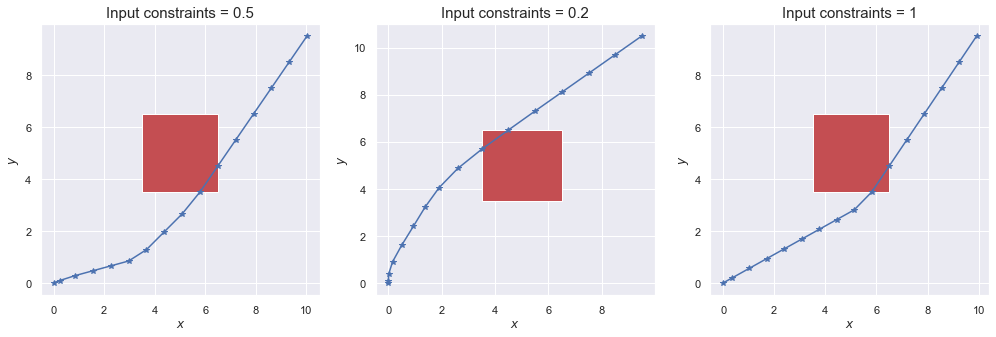

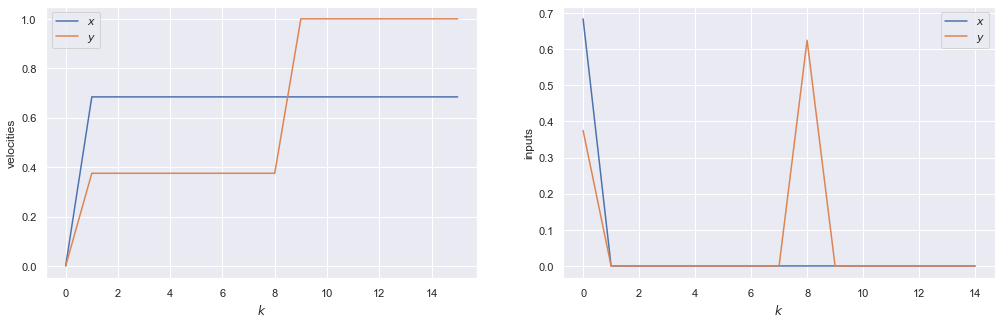

In [11]:
#### Plotting code ####
## Your plots should look like the ones below if your code is correct.
plt.figure(figsize=(17, 5))

x_vals = trajectory_opt(.5)[0]
u_vals = trajectory_opt(.5)[1]
plt.subplot(1,3,1)
plt.plot(x_vals[:,0],x_vals[:,1],'*-')
plt.fill(obsVerts[0,:],obsVerts[1,:],'r')
plt.title('Input constraints = {}'.format(0.5), fontsize=15)
plt.xlabel('$x$');plt.ylabel('$y$')

x_vals = trajectory_opt(.2)[0]
u_vals = trajectory_opt(.2)[1]
plt.subplot(1,3,2)
plt.plot(x_vals[:,0],x_vals[:,1],'*-')
plt.fill(obsVerts[0,:],obsVerts[1,:],'r')
plt.title('Input constraints = {}'.format(0.2), fontsize=15)
plt.xlabel('$x$');plt.ylabel('$y$')

x_vals = trajectory_opt(1)[0]
u_vals = trajectory_opt(1)[1]
plt.subplot(1,3,3)
plt.plot(x_vals[:,0],x_vals[:,1],'*-')
plt.fill(obsVerts[0,:],obsVerts[1,:],'r')
plt.title('Input constraints = {}'.format(1), fontsize=15)
plt.xlabel('$x$');plt.ylabel('$y$')
plt.show()

plt.figure(figsize=(17, 5))
plt.subplot(1,2,1)
plt.plot(np.arange(0,N+1).T,x_vals[:,2],'-',label='$x$')
plt.plot(np.arange(0,N+1).T,x_vals[:,3],'-',label='$y$')
plt.xlabel('$k$'); plt.ylabel('velocities')
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(0,N).T,u_vals[:,0],'-',label='$x$')
plt.plot(np.arange(0,N).T,u_vals[:,1],'-',label='$y$')
plt.xlabel('$k$'); plt.ylabel('inputs')
plt.legend()
plt.show()